In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
amazon_book=pd.read_csv(r"C:\Users\Anuradha\Desktop\excel data\marval data\bestsellers with categories.csv")

In [3]:
amazon_book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
amazon_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
amazon_book.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
amazon_book.shape

(550, 7)

In [7]:
amazon_book.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
amazon_book.isnull().any()
#any() will give output in true and false and sum() will give 0 and 1

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [12]:
amazon_book.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [13]:
import seaborn as sns 


<Axes: >

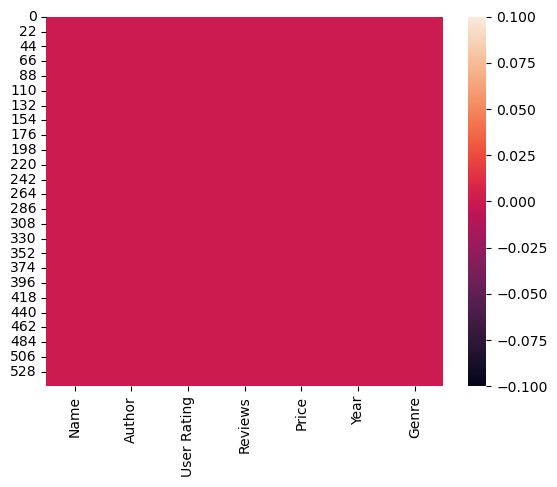

In [14]:
sns.heatmap(amazon_book.isnull())

outlier detection and treatment
outlier detection
Outliers are exterme value that deviate from other observations on data .they may indicate a variability in a measurement,experimental error or novelty.
Boxplot are great way of detecting outliers .Once the outliers have been detected.they can be imputed with 5th and 95th percentile.

<Axes: >

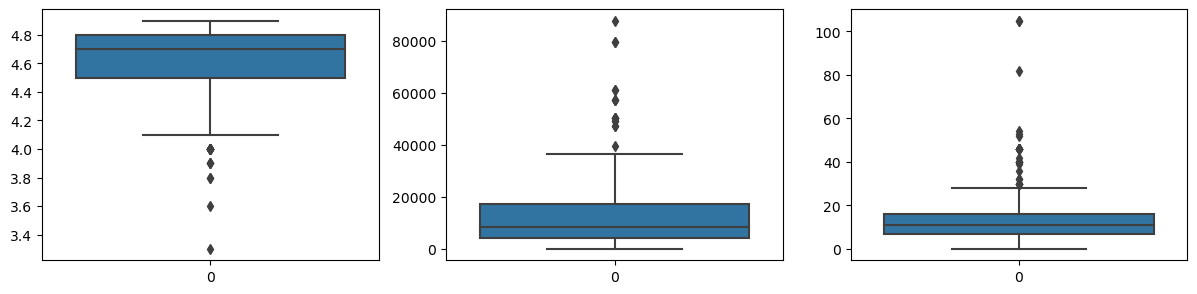

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(amazon_book['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(amazon_book['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(amazon_book['Price'])

These lower and upper levels outliers will be replaced by the 5th percentile respectively.

numpy.clip() is used to clip (limit) the values in an array.
syntax:numpy.clip(a,a_min,a_max,out=None)
parameters:
a) Array containing elements to clip.
a_min:minimum value.
If none ,clipping is not performed on lower interval edge.
Not more than one of the
a_min and a_max may be none
a_max=Maximum value

In [24]:
amazon_book['Price']=amazon_book['Price'].clip(lower=amazon_book['Price'].quantile(0.05),upper=amazon_book['Price'].quantile(0.95))

In [25]:
amazon_book['User Rating']=amazon_book['User Rating'].clip(lower=amazon_book['User Rating'].quantile(0.05),upper=amazon_book['User Rating'].quantile(0.95))

In [26]:
amazon_book['Reviews']=amazon_book['Reviews'].clip(lower=amazon_book['Reviews'].quantile(0.05),upper=amazon_book['Reviews'].quantile(0.95))

<Axes: >

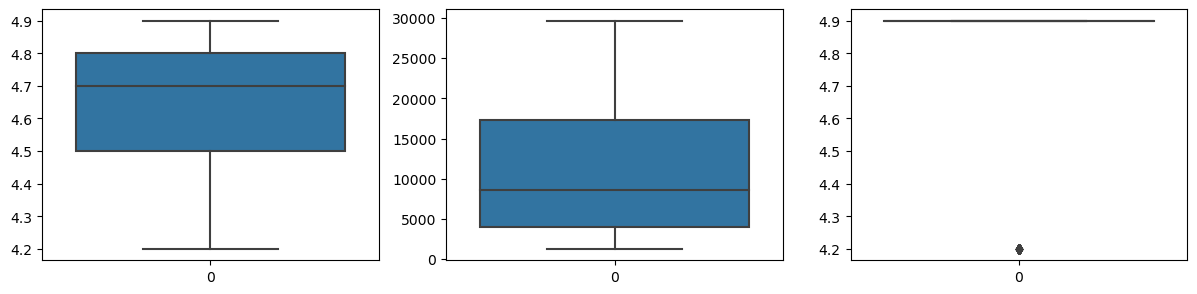

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(amazon_book['User Rating']


<Axes: >

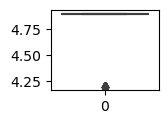

In [28]:
plt.subplot(4,4,3)
sns.boxplot(amazon_book['Price'])

<Axes: >

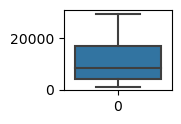

In [29]:
plt.subplot(4,4,2)
sns.boxplot(amazon_book['Reviews'])


Explore trend over the year for each genre

Number of best selling books in each genre each year.

<Axes: xlabel='Year', ylabel='count'>

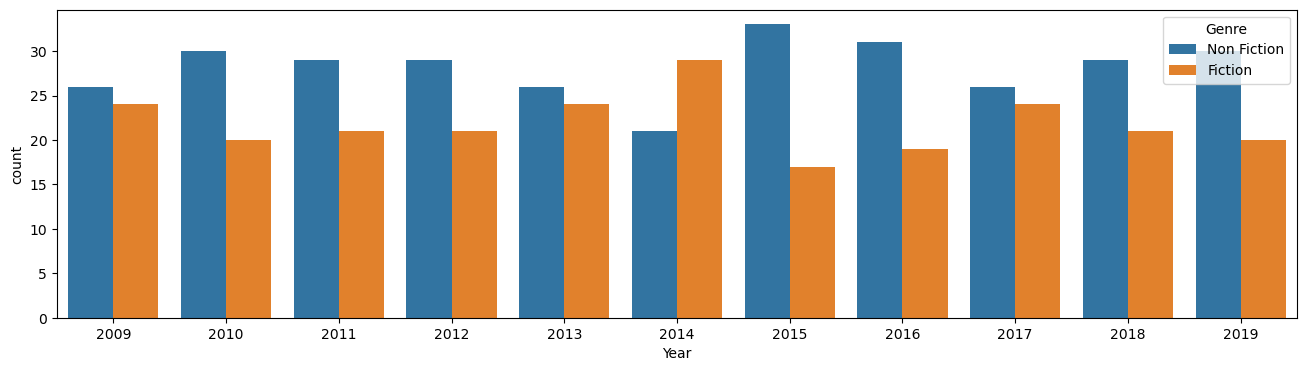

In [31]:
plt.figure(figsize=(16,4))
sns.countplot(x='Year',data=amazon_book,hue='Genre')